<a href="https://colab.research.google.com/github/gopikrsmscs/MachineLearningModels/blob/main/CIFAR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import the necessary Modules
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



**Step1: Download the CIFAR DATA set.** <br>
The TensorFlow Datasets (TFDS) provides a convenient way to load the CIFAR dataset. With datasets, the CIFAR dataset can be easily downloaded, preprocessed, and used for training and evaluation of deep learning models.

In [ ]:
(Xtrain, Ytrain), (Xtest, Ytest) = datasets.cifar10.load_data()

**Step2: Analyse the CIFAR dataset.**

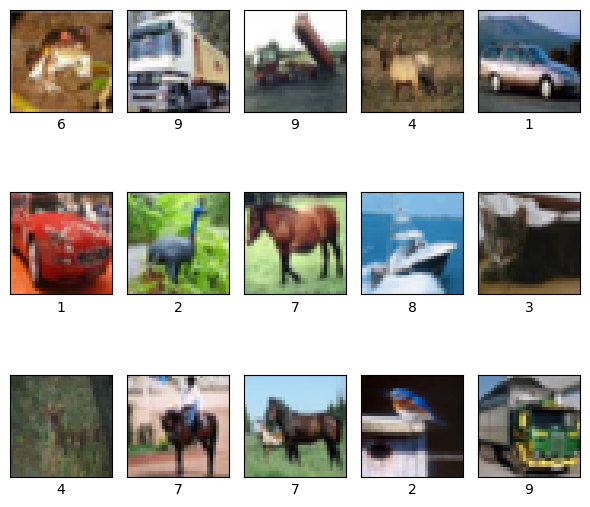

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(6,6))
axs = axs.flatten()

for i in range(15):
    axs[i].imshow(Xtrain[i], cmap=plt.cm.binary)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel(Ytrain[i][0])
    
plt.tight_layout()
plt.show()

*   From the above plot the images have label indexes instead of label names
*   From the dataset description the possible label names are
  > class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

1.   label 0 is 'airplane'
2.   label 1 is 'automobile' etc.



In [ ]:
print("Train Samples",Xtrain.shape)
print("Test Samples",Xtest.shape)
print(Xtrain[0][0])

Train Samples (50000, 32, 32, 3)
Test Samples (10000, 32, 32, 3)
[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]



*   There are 50000 training samples
*   The number of testing samples are 10000
*   The images have 3 channels **RGB**
*   The images have pixel values range from **0-255**

**Step3: Preprocess the data.**
Since the pixel values are in the range of 0-255 ,Normalizing it to float numbers in betweren 0 and 1.0

In [ ]:
Xtrain = Xtrain / 255.0, 
# Ytrain = Ytrain / 255.0,
Xtest = Xtest / 255.0, 
# Ytest = Ytest / 255.0,


**Step4: Build Convolution Model**

Using Keras and tensorflow to build the CNN model. Below is the sequential model with CON2D,Maxpooling,Flatten and Dense layer. Since CIFAR data set has 10 classification tasks added Denselayer with 10 nodes at last level.

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add( MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add( MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

**Step5: Train Model**



*   Adam allows the optimizer to converge faster and more efficiently than traditional optimization algorithms such as stochastic gradient descent
* Sparse categorical cross-entropy is a loss function used in classification tasks where the output labels are mutually exclusive .
*   Traing the above build model for 15 epochs.





In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xtest, Ytest))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 24s 8ms/step - loss: 1.5001 - accuracy: 0.4520 - val_loss: 1.2378 - val_accuracy: 0.5562
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0765 - accuracy: 0.6229 - val_loss: 0.9867 - val_accuracy: 0.6532
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9190 - accuracy: 0.6765 - val_loss: 0.8373 - val_accuracy: 0.7050
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8255 - accuracy: 0.7117 - val_loss: 0.8307 - val_accuracy: 0.7133
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7702 - accuracy: 0.7308 - val_loss: 0.7532 - val_accuracy: 0.7358
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7231 - accuracy: 0.7478 - val_loss: 0.7252 - val_accuracy: 0.7530
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6783 - accuracy: 0.7638 - val_loss: 0.6821 - val_accuracy: 0.7

**Step5: Evaluate Model**

313/313 - 1s - loss: 0.7043 - accuracy: 0.7673 - 855ms/epoch - 3ms/step
Test Loss: 0.7043
Test Accuracy: 0.7673


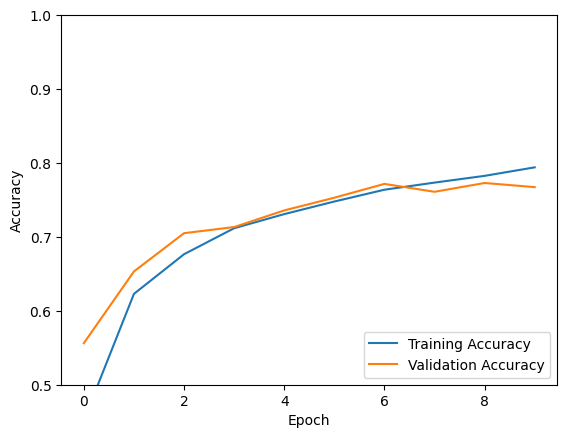

In [ ]:
# Plot accuracy history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate model on test set
test_loss, test_acc = model.evaluate(Xtest, Ytest, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

**Step6: Using Pre trained Model(Transfer Learning)**

The VGG16 model is known for its simplicity and effectiveness, and has achieved excellent results on a variety of image classification tasks, including the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2014, where it achieved the top-5 test error rate of 7.3%. i am using it as a pre-trained model for transfer learning, where i am fine-tuning it to cifar dataset by adding 10 nodes in the last layer of the network.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze pre-trained layers
for layer in vgg16_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(vgg16_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

print(Ytrain.shape)
print(Ytest.shape)

modelVGG = Model(inputs=vgg16_model.input, outputs=x)

modelVGG.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historyVgg=modelVGG.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xtest, Ytest))


(50000, 1)
(10000, 1)
Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3438 - accuracy: 0.5299 - val_loss: 1.2660 - val_accuracy: 0.5509
Epoch 2/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1659 - accuracy: 0.5923 - val_loss: 1.1861 - val_accuracy: 0.5865
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1006 - accuracy: 0.6157 - val_loss: 1.1337 - val_accuracy: 0.6040
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0513 - accuracy: 0.6302 - val_loss: 1.1305 - val_accuracy: 0.6029
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0107 - accuracy: 0.6462 - val_loss: 1.1234 - val_accuracy: 0.6089
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9713 - accuracy: 0.6583 - val_loss: 1.0985 - val_accuracy: 0.6215
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9357 - accuracy: 0.671

**Step7: Evaluate Pretrained Model**

313/313 - 3s - loss: 1.1118 - accuracy: 0.6185 - 3s/epoch - 9ms/step
Test Loss for VGG: 1.1118
Test Accuracy for VGG: 0.6185


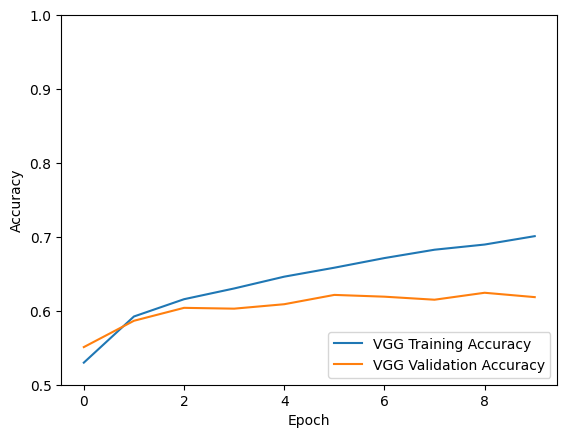

In [ ]:
# Plot accuracy history
plt.plot(historyVgg.history['accuracy'], label='VGG Training Accuracy')
plt.plot(historyVgg.history['val_accuracy'], label='VGG Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate model on test set
test_loss, test_acc = modelVGG.evaluate(Xtest, Ytest, verbose=2)
print(f'Test Loss for VGG: {test_loss:.4f}')
print(f'Test Accuracy for VGG: {test_acc:.4f}')

**Conclusion**
*   After training for 10 Epochs my archetecture performed better than the pretrained vgg16
*   The Accuracy for the CNN is 0.76
*   The Accuracy of the VGG16 is 0.615





**References**:
*   https://www.cs.toronto.edu/~kriz/cifar.html
*   https://www.tensorflow.org/tutorials/images/cnn
*   https://keras.io/api/models/sequential/
*   https://keras.io/api/layers/
*   https://www.tensorflow.org/tutorials
*   https://keras.io/api/applications/vgg/